In [2]:
# импортируем библиотеки, которые понадобятся в работе.
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
# загружаем базу данных для обучения и тестирования.
house = pd.read_csv('../Проект 13/train.csv')
house_test = pd.read_csv('../Проект 13/test.csv')
house.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Анализ данных, подготовка таблицы для применения алгоритмов предсказания.

In [4]:
# объединяем данные для обучения и тестирования в отдельный датафрейм. 
# Combining training & testing data for preposesing after that we do not write the same code for test data.
df = pd.concat([house, house_test], axis=0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
# вызываем функцию columns, которая отображает названия всех столбцов в датафрейм.
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# задаем целевую переменную
y = house["SalePrice"]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
# смотрим, какое количество ненулевых значений находится в каждом столбце.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

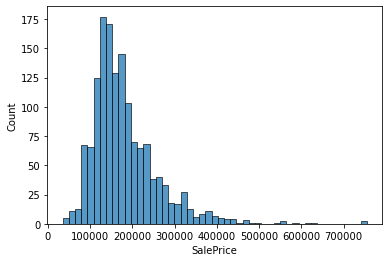

In [8]:
# строим гистограмму распредения цены.
sns.histplot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

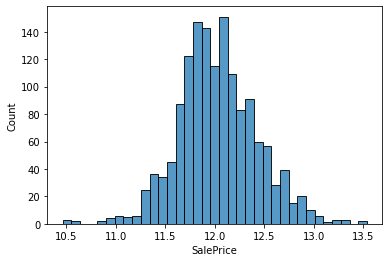

In [9]:
# выравниваем значения по оси Х путем логарифмирования. Выводим гистограмму распределения цены.
sns.histplot(np.log1p(df['SalePrice']))

In [10]:
# заполняем значения NAN в столбцах другими категориальными значениями.
df['Alley'].fillna('no access', inplace=True)
df['BsmtQual'].fillna('no basement', inplace=True)
df['BsmtCond'].fillna('no basement', inplace=True)
df['BsmtFinType1'].fillna('no basement', inplace=True)
df['BsmtFinType2'].fillna('no basement', inplace=True)
df['FireplaceQu'].fillna('no Fireplace', inplace=True)
df['GarageType'].fillna('no Garage', inplace=True)
df['GarageFinish'].fillna('no Garage', inplace=True)
df['GarageQual'].fillna('no Garage', inplace=True)
df['GarageCond'].fillna('no Garage', inplace=True)
df['PoolQC'].fillna('no Pool', inplace=True)
df['Fence'].fillna('no Fence', inplace=True)
df['MasVnrType'].fillna('no type', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['BsmtExposure'].fillna('no exposure', inplace=True)
df['MiscFeature'].fillna('none', inplace=True)
df['Electrical'].fillna('SBrkr', inplace=True)
df['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace=True)
df['GarageYrBlt'].fillna(house['GarageYrBlt'].mean(), inplace=True)

In [11]:
# выводим первые 10 строк датафрейма с преобразованными строками.
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.000000,9600,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.000000,11250,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.000000,9550,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.000000,14260,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.000000,14115,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.000000,10084,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,8,2007,WD,Normal,307000.0
7,8,60,RL,70.049958,10382,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.000000,6120,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.000000,7420,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,1,2008,WD,Normal,118000.0


In [12]:
# выводим основные статистические показатели целевой переменной.
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
# определяем столбцы, которые имеют тип данных "object".
object_columns = list(df.select_dtypes("object").columns)
object_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
# создаем новый датафрейм.
df_2 = pd.DataFrame()

In [15]:
# Цикл, который выводит таблицу со столбцами, у которых значения типа "object" изменяются на числовые значения 0 и 1.
for column in object_columns:
    df_2 = pd.concat([df_2, pd.get_dummies(df[column], prefix=column)], axis=1)

In [16]:
# выводим датафрейм.
df_2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_no access,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [18]:
# Создаем новый датафрейм, объединяя исходный датафрейм с новым. 
df_3 = pd.concat([df.select_dtypes(exclude='object'), df_2], axis=1)


In [19]:
# Выводим датафрейм.
df_3

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
df_3.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=305)

In [66]:
# Создаем новый датафрейм, в котором удаляем столбцы Id и SalesPrice. 
df_5 = df_3.drop(['Id', "SalePrice"], axis=1)
df_5

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: 

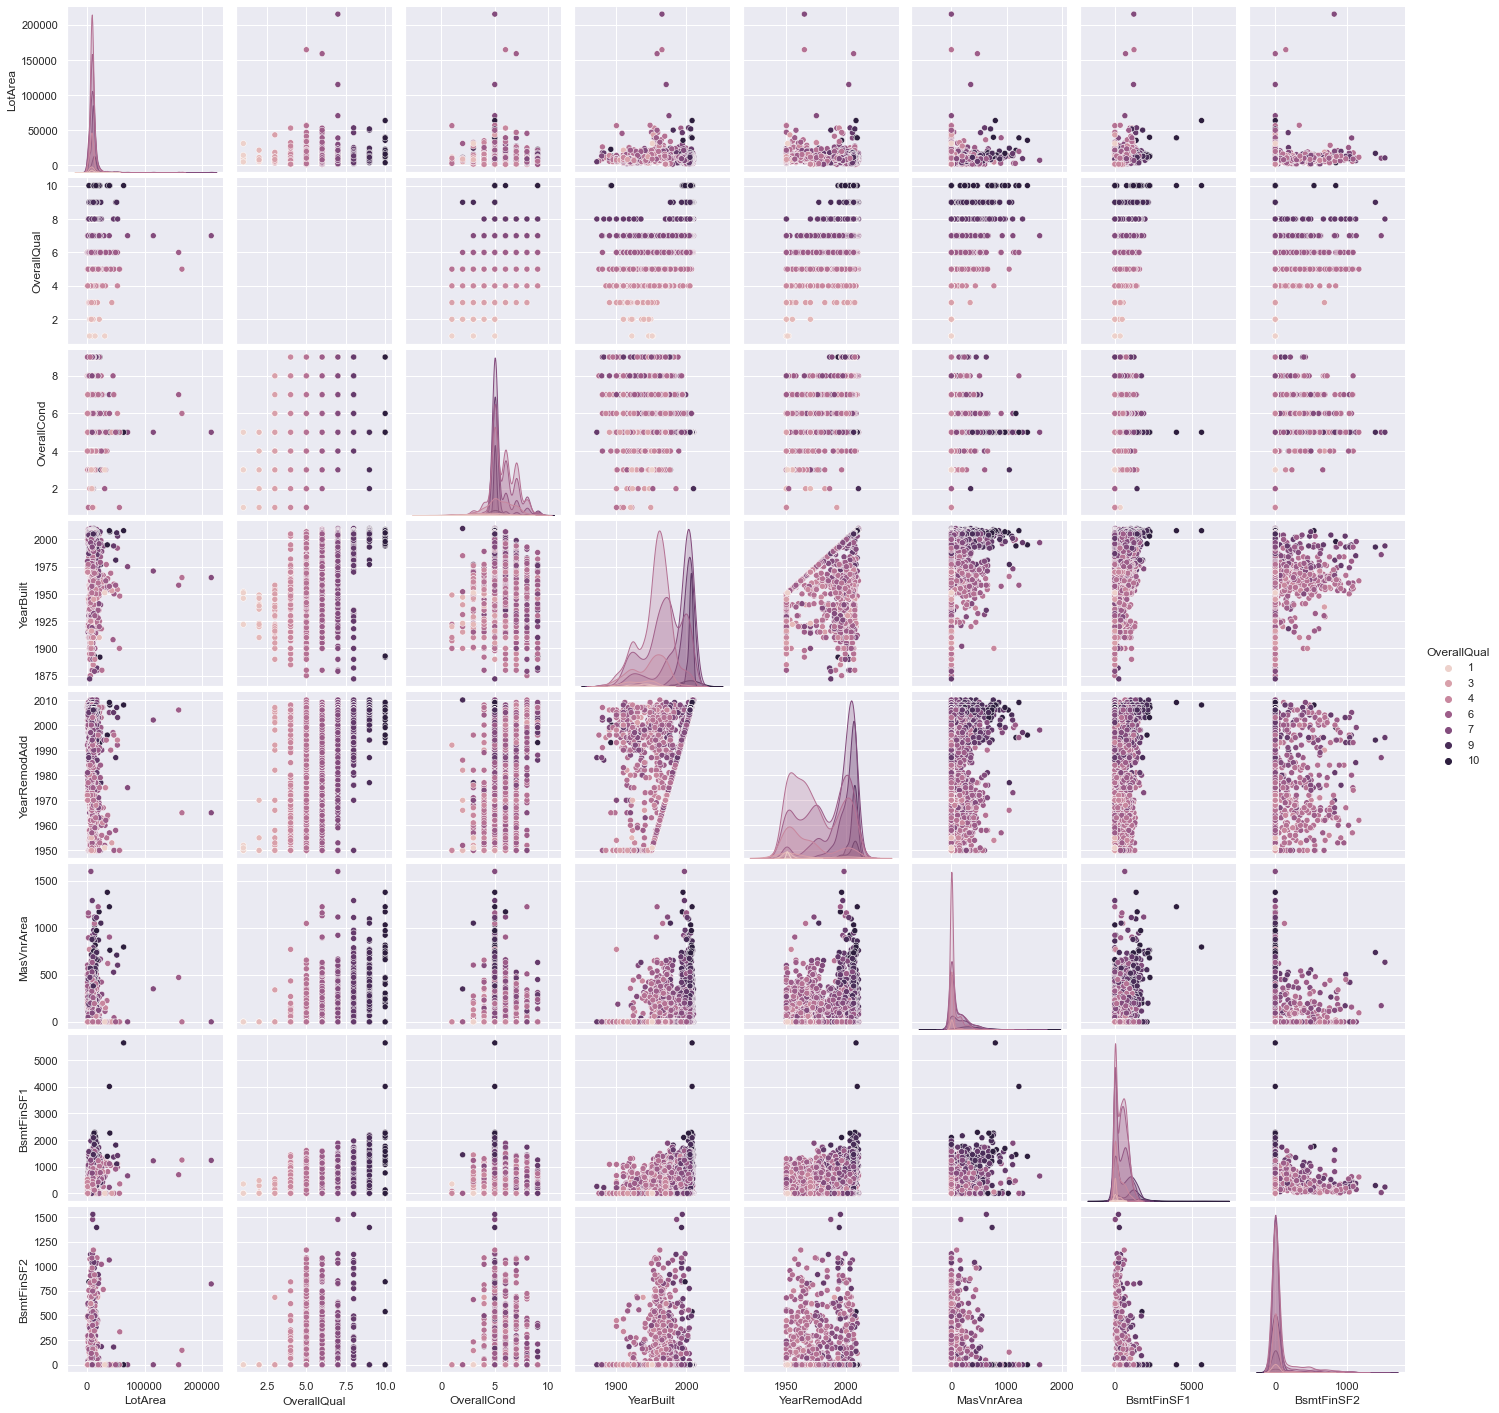

In [72]:
sns.pairplot(df_5, 
             x_vars=list(df_5.columns[2:8]), 
             y_vars=list(df_5.columns[2:8]), 
             hue='OverallQual')

/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


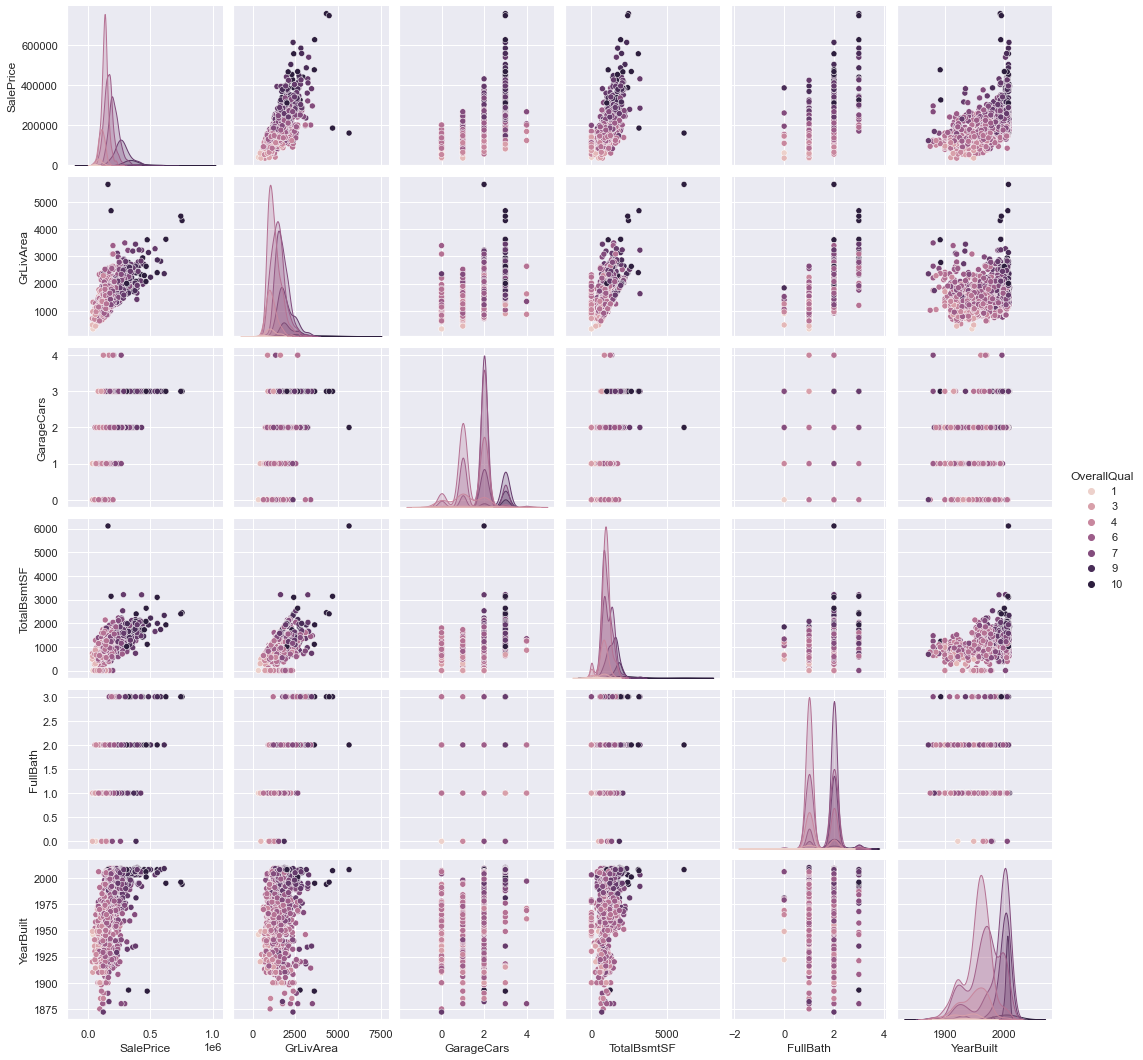

In [70]:
# строим графики, показывающие "отношения" между всеми парами переменных, 
# которые показали наибольшую связь по таблице корреляции с ценой дома. 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5, hue="OverallQual")
plt.show();

In [145]:
#df_5['MasVnrArea_int'] = [int(row) for row in df_5['MasVnrArea']]
#df_5['BsmtFinSF1_int'] = [int(row) for row in df_5['BsmtFinSF1']]
#df_5

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrArea_int,BsmtFinSF1_int
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,1,0,0,0,0,1,0,196,706
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,1,0,0,0,0,1,0,0,978
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,1,0,0,0,0,1,0,162,486
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,1,1,0,0,0,0,0,0,216
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,1,0,0,0,0,1,0,350,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,1,1,0,0,0,0,0,0,252
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,1,1,0,0,0,0,0,0,1224
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,1,0,0,0,0,1,0,0,337


# Модели предсказаний для всех признаков.

In [22]:
# Задаем целевую переменную. А также х и y.
target = 'SalePrice'
x = df_5[:len(house['SalePrice'])].to_numpy()
y = df_3[target][:len(house['SalePrice'])].to_numpy()
x.shape, y.shape

((1460, 303), (1460,))

In [23]:
# Разбиваем массив данных на обучающую и тестовую выборку в тренировочном файле.
from sklearn.model_selection import 

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1095, 303), (365, 303), (1095,), (365,))

In [24]:
# Стандартизация данных путем удаления среднего и масштабирования до единичной дисперсии.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm.shape, x_valid_norm.shape

((1095, 303), (365, 303))

In [62]:
# Применение алгоритма линейной регрессии для предсказания целевой переменной.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


reg_1 = LinearRegression()
reg_1.fit(x_train_norm, y_train)

# качество модели
print(f'''
    STD:
    train {y_train.std() :.2f}
    test {y_valid.std() :.2f}


    RMSE:
    train {mean_squared_error(reg_1.predict(x_train_norm), y_train)**.5 :.2f}
    test {mean_squared_error(reg_1.predict(x_valid_norm), y_valid)**.5 :.2f}

    R2:
    train {r2_score(reg_1.predict(x_train_norm), y_train) :.2f}
    test {r2_score(reg_1.predict(x_valid_norm), y_valid) :.2f}

''')




    STD:
    train 78507.87
    test 81934.29


    RMSE:
    train 20169.96
    test 31434894135406548.00

    R2:
    train 0.93
    test -0.01




In [63]:
# Применение алгоритма CatBoostRegressor. Импортируем CatBoostRegressor из библиотеки.
from catboost import CatBoostRegressor

In [64]:
cbr_1 = CatBoostRegressor(iterations = 2500, depth=5)

In [65]:
cbr_1.fit(x_train_norm, y_train, verbose = 2)
y_pred_cbr = cbr_1.predict(x_valid)

Learning rate set to 0.019769
0:	learn: 77570.7813225	total: 5.21ms	remaining: 13s
2:	learn: 75765.6756211	total: 9.38ms	remaining: 7.81s
4:	learn: 73896.7751552	total: 12.7ms	remaining: 6.34s
6:	learn: 72140.8109352	total: 15.9ms	remaining: 5.65s
8:	learn: 70411.6709101	total: 20.1ms	remaining: 5.57s
10:	learn: 68793.4217664	total: 24.1ms	remaining: 5.45s
12:	learn: 67229.9464070	total: 28.6ms	remaining: 5.48s
14:	learn: 65740.7996342	total: 32.1ms	remaining: 5.32s
16:	learn: 64331.7050672	total: 35.6ms	remaining: 5.2s
18:	learn: 62959.0999679	total: 39.4ms	remaining: 5.14s
20:	learn: 61638.8234379	total: 43ms	remaining: 5.08s
22:	learn: 60289.7443477	total: 47.6ms	remaining: 5.12s
24:	learn: 59134.4579183	total: 50.9ms	remaining: 5.04s
26:	learn: 57923.0825241	total: 54.4ms	remaining: 4.98s
28:	learn: 56719.4162945	total: 58.1ms	remaining: 4.95s
30:	learn: 55637.5097727	total: 61.7ms	remaining: 4.91s
32:	learn: 54607.6963758	total: 65ms	remaining: 4.86s
34:	learn: 53577.1296379	total

322:	learn: 20958.1006454	total: 576ms	remaining: 3.88s
324:	learn: 20896.6234305	total: 579ms	remaining: 3.88s
326:	learn: 20836.9892981	total: 582ms	remaining: 3.87s
328:	learn: 20805.0587358	total: 586ms	remaining: 3.87s
330:	learn: 20741.9898268	total: 590ms	remaining: 3.87s
332:	learn: 20701.6099086	total: 594ms	remaining: 3.87s
334:	learn: 20649.6854535	total: 598ms	remaining: 3.87s
336:	learn: 20578.3856149	total: 602ms	remaining: 3.86s
338:	learn: 20552.6245889	total: 606ms	remaining: 3.86s
340:	learn: 20497.3501413	total: 611ms	remaining: 3.87s
342:	learn: 20455.2127447	total: 616ms	remaining: 3.87s
344:	learn: 20403.2726213	total: 619ms	remaining: 3.87s
346:	learn: 20337.3565175	total: 623ms	remaining: 3.87s
348:	learn: 20264.9510688	total: 627ms	remaining: 3.86s
350:	learn: 20217.3050820	total: 631ms	remaining: 3.86s
352:	learn: 20149.0263823	total: 634ms	remaining: 3.86s
354:	learn: 20102.8223978	total: 638ms	remaining: 3.85s
356:	learn: 20051.9673602	total: 641ms	remaining

648:	learn: 15415.5046341	total: 1.16s	remaining: 3.31s
650:	learn: 15389.8586622	total: 1.16s	remaining: 3.31s
652:	learn: 15376.2811176	total: 1.17s	remaining: 3.31s
654:	learn: 15348.4245637	total: 1.17s	remaining: 3.31s
656:	learn: 15333.4723487	total: 1.18s	remaining: 3.3s
658:	learn: 15316.0879645	total: 1.18s	remaining: 3.3s
660:	learn: 15309.3367627	total: 1.19s	remaining: 3.3s
662:	learn: 15289.5917435	total: 1.19s	remaining: 3.3s
664:	learn: 15274.8900854	total: 1.2s	remaining: 3.3s
666:	learn: 15247.0237762	total: 1.2s	remaining: 3.3s
668:	learn: 15235.1555481	total: 1.21s	remaining: 3.3s
670:	learn: 15207.5612108	total: 1.21s	remaining: 3.3s
672:	learn: 15184.3469153	total: 1.22s	remaining: 3.3s
674:	learn: 15169.3201070	total: 1.22s	remaining: 3.3s
676:	learn: 15148.8950577	total: 1.22s	remaining: 3.3s
678:	learn: 15136.0710198	total: 1.23s	remaining: 3.29s
680:	learn: 15118.2518198	total: 1.23s	remaining: 3.29s
682:	learn: 15103.7880624	total: 1.24s	remaining: 3.29s
684:	

968:	learn: 12570.1321746	total: 1.74s	remaining: 2.75s
970:	learn: 12555.3863767	total: 1.74s	remaining: 2.74s
972:	learn: 12550.4197759	total: 1.75s	remaining: 2.74s
974:	learn: 12534.4674038	total: 1.75s	remaining: 2.73s
976:	learn: 12517.7679838	total: 1.75s	remaining: 2.73s
978:	learn: 12496.9044929	total: 1.76s	remaining: 2.73s
980:	learn: 12490.6663875	total: 1.76s	remaining: 2.73s
982:	learn: 12471.7572365	total: 1.76s	remaining: 2.72s
984:	learn: 12453.4748999	total: 1.77s	remaining: 2.72s
986:	learn: 12445.2942125	total: 1.77s	remaining: 2.72s
988:	learn: 12425.0396081	total: 1.77s	remaining: 2.71s
990:	learn: 12414.1838301	total: 1.78s	remaining: 2.71s
992:	learn: 12402.4882451	total: 1.78s	remaining: 2.7s
994:	learn: 12384.8271171	total: 1.78s	remaining: 2.7s
996:	learn: 12376.9609201	total: 1.79s	remaining: 2.7s
998:	learn: 12364.2781611	total: 1.79s	remaining: 2.69s
1000:	learn: 12354.4567669	total: 1.79s	remaining: 2.69s
1002:	learn: 12345.2634640	total: 1.8s	remaining: 

1308:	learn: 10568.8285178	total: 2.32s	remaining: 2.11s
1310:	learn: 10563.5574212	total: 2.33s	remaining: 2.11s
1312:	learn: 10552.1916153	total: 2.33s	remaining: 2.1s
1314:	learn: 10541.7433916	total: 2.33s	remaining: 2.1s
1316:	learn: 10525.8528946	total: 2.33s	remaining: 2.1s
1318:	learn: 10517.6959439	total: 2.34s	remaining: 2.09s
1320:	learn: 10509.6502122	total: 2.34s	remaining: 2.09s
1322:	learn: 10498.6253499	total: 2.35s	remaining: 2.09s
1324:	learn: 10489.1337699	total: 2.35s	remaining: 2.08s
1326:	learn: 10476.0848933	total: 2.35s	remaining: 2.08s
1328:	learn: 10462.7258290	total: 2.36s	remaining: 2.08s
1330:	learn: 10449.7398026	total: 2.36s	remaining: 2.07s
1332:	learn: 10439.3471109	total: 2.36s	remaining: 2.07s
1334:	learn: 10428.4847188	total: 2.37s	remaining: 2.06s
1336:	learn: 10417.4252972	total: 2.37s	remaining: 2.06s
1338:	learn: 10408.7414223	total: 2.38s	remaining: 2.06s
1340:	learn: 10394.0106347	total: 2.38s	remaining: 2.06s
1342:	learn: 10382.0869619	total: 

1644:	learn: 9002.0490705	total: 2.91s	remaining: 1.51s
1646:	learn: 8995.1621954	total: 2.92s	remaining: 1.51s
1648:	learn: 8987.0811762	total: 2.92s	remaining: 1.51s
1650:	learn: 8977.0026649	total: 2.92s	remaining: 1.5s
1652:	learn: 8967.7005439	total: 2.93s	remaining: 1.5s
1654:	learn: 8959.2359168	total: 2.93s	remaining: 1.5s
1656:	learn: 8949.9585131	total: 2.93s	remaining: 1.49s
1658:	learn: 8941.5737115	total: 2.94s	remaining: 1.49s
1660:	learn: 8939.1139131	total: 2.94s	remaining: 1.48s
1662:	learn: 8932.4469798	total: 2.94s	remaining: 1.48s
1664:	learn: 8925.0380391	total: 2.95s	remaining: 1.48s
1666:	learn: 8916.5577072	total: 2.95s	remaining: 1.47s
1668:	learn: 8912.5910787	total: 2.95s	remaining: 1.47s
1670:	learn: 8903.8262831	total: 2.96s	remaining: 1.47s
1672:	learn: 8896.1778290	total: 2.96s	remaining: 1.46s
1674:	learn: 8891.8071836	total: 2.96s	remaining: 1.46s
1676:	learn: 8884.6659806	total: 2.97s	remaining: 1.46s
1678:	learn: 8872.8719491	total: 2.97s	remaining: 1

1988:	learn: 7758.6081324	total: 3.5s	remaining: 899ms
1990:	learn: 7754.1415752	total: 3.5s	remaining: 896ms
1992:	learn: 7748.6455931	total: 3.51s	remaining: 892ms
1994:	learn: 7742.7304790	total: 3.51s	remaining: 888ms
1996:	learn: 7737.1360288	total: 3.51s	remaining: 885ms
1998:	learn: 7730.2494092	total: 3.52s	remaining: 882ms
2000:	learn: 7720.6345171	total: 3.52s	remaining: 878ms
2002:	learn: 7712.0739475	total: 3.52s	remaining: 875ms
2004:	learn: 7707.1196984	total: 3.53s	remaining: 871ms
2006:	learn: 7698.7491622	total: 3.53s	remaining: 868ms
2008:	learn: 7691.5608192	total: 3.53s	remaining: 864ms
2010:	learn: 7688.7254915	total: 3.54s	remaining: 860ms
2012:	learn: 7681.9727718	total: 3.54s	remaining: 857ms
2014:	learn: 7677.0021684	total: 3.54s	remaining: 853ms
2016:	learn: 7673.8708852	total: 3.55s	remaining: 850ms
2018:	learn: 7664.7433784	total: 3.55s	remaining: 846ms
2020:	learn: 7659.6626003	total: 3.56s	remaining: 843ms
2022:	learn: 7651.4257697	total: 3.56s	remaining: 

2336:	learn: 6782.9653197	total: 4.09s	remaining: 285ms
2338:	learn: 6775.5009456	total: 4.09s	remaining: 282ms
2340:	learn: 6772.5169441	total: 4.09s	remaining: 278ms
2342:	learn: 6770.2588394	total: 4.1s	remaining: 275ms
2344:	learn: 6765.4332529	total: 4.1s	remaining: 271ms
2346:	learn: 6759.7405250	total: 4.11s	remaining: 268ms
2348:	learn: 6753.0008700	total: 4.11s	remaining: 264ms
2350:	learn: 6745.2556670	total: 4.11s	remaining: 261ms
2352:	learn: 6738.9590355	total: 4.12s	remaining: 257ms
2354:	learn: 6736.3806800	total: 4.12s	remaining: 254ms
2356:	learn: 6734.7874347	total: 4.12s	remaining: 250ms
2358:	learn: 6731.1688618	total: 4.13s	remaining: 247ms
2360:	learn: 6723.7070816	total: 4.13s	remaining: 243ms
2362:	learn: 6720.8580636	total: 4.13s	remaining: 240ms
2364:	learn: 6713.7719744	total: 4.13s	remaining: 236ms
2366:	learn: 6709.0364006	total: 4.14s	remaining: 233ms
2368:	learn: 6704.1341707	total: 4.14s	remaining: 229ms
2370:	learn: 6697.8099208	total: 4.14s	remaining: 

In [29]:
# оценка качества примененного алгоритма CatBoostRegressor при помощи метрики RMSE.
print(f'CatBoost RMSE: {mean_squared_error(y_valid, y_pred_cbr)**.5}')

CatBoost RMSE: 24991.56269887488


In [30]:
# Применение алгоритма RandomForestRegressor. Импортируем RandomForestRegressor из библиотеки.
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Задаем гиперпараметр для модели RandomForestRegressor методом случайного подбора "деревьев".
rf_3_1 = RandomForestRegressor(n_estimators = 3)
rf_100_1 = RandomForestRegressor(n_estimators = 100)
rf_200_1 = RandomForestRegressor(n_estimators = 200)
rf_500_1 = RandomForestRegressor(n_estimators = 500)

In [32]:
# обучаем выборку.
rf_3_1.fit(x_train, y_train)
rf_100_1.fit(x_train, y_train)
rf_200_1.fit(x_train, y_train)
rf_500_1.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [33]:
# оцениваем качество выбранной модели RandomForestRegressor при помощи метрики RMSE.
print('3 trees', mean_squared_error(y_valid, rf_3_1.predict(x_valid))**.5)
print('100 trees', mean_squared_error(y_valid, rf_100_1.predict(x_valid))**.5)
print('200 trees', mean_squared_error(y_valid, rf_200_1.predict(x_valid))**.5)
print('500 trees', mean_squared_error(y_valid, rf_500_1.predict(x_valid))**.5)

3 trees 27135.301813048547
100 trees 25472.001602016822
200 trees 26035.950274733987
500 trees 26688.653677764538


In [34]:
# При помощи feature_importances_ оцениваем влияние всех признаков, указанных в столбцах, на целевую переменную. 
rf_100_1.feature_importances_

array([1.65500218e-03, 8.58643454e-03, 1.85421001e-02, 5.22736702e-01,
       5.21146558e-03, 1.16316305e-02, 8.11944019e-03, 5.28364909e-03,
       3.10562283e-02, 5.10222542e-04, 6.00215782e-03, 3.89891442e-02,
       3.65880650e-02, 1.37377701e-02, 1.11896324e-04, 1.09538595e-01,
       8.93477546e-04, 1.84218264e-03, 6.64335674e-03, 7.40873909e-04,
       2.12770812e-03, 2.67911565e-04, 1.16870948e-02, 2.53453067e-03,
       5.86860738e-03, 3.49584728e-02, 1.92618984e-02, 4.66418617e-03,
       5.00080481e-03, 5.00463753e-04, 1.99860571e-04, 1.49067627e-03,
       5.31916215e-05, 1.49674513e-05, 4.12695676e-03, 1.53734129e-03,
       8.58804307e-05, 4.91972068e-05, 8.29815800e-06, 5.36090750e-04,
       1.53703329e-03, 2.68176976e-07, 2.21273886e-07, 4.53468296e-05,
       4.39892721e-05, 5.06397226e-04, 4.03027914e-04, 4.89377809e-04,
       4.24499650e-05, 1.87793598e-03, 1.08283071e-03, 2.90249298e-04,
       4.55012597e-05, 5.43176820e-04, 0.00000000e+00, 0.00000000e+00,
      

In [35]:
# Выводим таблицу с отсортированными признаками и степенью их важности для предсказания цены.
fimportance_null = pd.DataFrame([df_5.columns,rf_100_1.feature_importances_]).T.sort_values(1, ascending=False)
fimportance_null.tail(50)

,0,1
157,Exterior2nd_Other,4.61557e-06
291,SaleType_ConLD,4.36279e-06
99,Condition2_Feedr,4.34519e-06
115,HouseStyle_2.5Unf,3.94919e-06
183,Foundation_Wood,3.62862e-06
66,Neighborhood_BrDale,3.60679e-06
140,Exterior1st_ImStucc,2.61053e-06
112,HouseStyle_1.5Unf,2.58846e-06
100,Condition2_Norm,2.54323e-06
293,SaleType_ConLw,2.28108e-06


 # Модели предсказаний с признаками, которые показали свою важность 
 после применения алгоритма RandomForestRegressor. 

In [36]:
# Создаем датафрейм, из которого удаляем нулевые признаки из предыдущей таблицы.
df_6 = df_5.drop(['Utilities_NoSeWa', 'PoolQC_Fa', 'Utilities_AllPub', 
                  'Exterior1st_AsphShn', 'PoolQC_Ex', 'RoofMatl_Metal', 'RoofStyle_Shed',
                 'HeatingQC_Po', 'Condition2_RRAn', 'Condition2_RRAe', 'GarageCond_Ex', 'Electrical_Mix'], 
                 axis=1)
df_6

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
# Задаем целевую переменную. А также х и y.
target = 'SalePrice'
x = df_6[:len(house['SalePrice'])].to_numpy()
y = df_3[target][:len(house['SalePrice'])].to_numpy()
x.shape, y.shape

((1460, 291), (1460,))

In [38]:
# Разбиваем массив данных на обучающую и тестовую выборку в тренировочном файле.
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1095, 291), (365, 291), (1095,), (365,))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm.shape, x_valid_norm.shape

((1095, 291), (365, 291))

In [40]:
# Применение алгоритма RandomForestRegressor. Импортируем RandomForestRegressor из библиотеки.
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Задаем гиперпараметр для модели RandomForestRegressor методом случайного подбора "деревьев".
rf_3_2 = RandomForestRegressor(n_estimators = 3)
rf_100_2 = RandomForestRegressor(n_estimators = 100)
rf_200_2 = RandomForestRegressor(n_estimators = 200)
rf_500_2 = RandomForestRegressor(n_estimators = 500)

In [58]:
target = 'SalePrice'
x_test = df_6[len(house['SalePrice']):].to_numpy()

x_test.shape

(1459, 291)

In [42]:
# обучаем выборку.
rf_3_2.fit(x_train, y_train)
rf_100_2.fit(x_train, y_train)
rf_200_2.fit(x_train, y_train)
rf_500_2.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [43]:
# оцениваем качество выбранной модели RandomForestRegressor при помощи метрики RMSE.
print('3 trees', mean_squared_error(y_valid, rf_3_2.predict(x_valid))**.5)
print('100 trees', mean_squared_error(y_valid, rf_100_2.predict(x_valid))**.5)
print('200 trees', mean_squared_error(y_valid, rf_200_2.predict(x_valid))**.5)
print('500 trees', mean_squared_error(y_valid, rf_500_2.predict(x_valid))**.5)

3 trees 32495.193364347
100 trees 26551.695997075556
200 trees 27826.821777293106
500 trees 26504.087566591366


In [44]:
# Применение алгоритма CatBoostRegressor. Импортируем CatBoostRegressor из библиотеки.
from catboost import CatBoostRegressor

In [45]:
cbr_1 = CatBoostRegressor(iterations = 2500, depth=5)

In [46]:
cbr_1.fit(x_train, y_train, verbose = 2)
y_pred_cbr = cbr_1.predict(x_valid)

Learning rate set to 0.019769
0:	learn: 77570.7813225	total: 1.8ms	remaining: 4.49s
2:	learn: 75765.6756211	total: 5.1ms	remaining: 4.25s
4:	learn: 73896.7751552	total: 8.98ms	remaining: 4.48s
6:	learn: 72140.8109352	total: 12.3ms	remaining: 4.37s
8:	learn: 70411.6709101	total: 16ms	remaining: 4.42s
10:	learn: 68793.4217664	total: 19.4ms	remaining: 4.39s
12:	learn: 67229.9464070	total: 23.2ms	remaining: 4.44s
14:	learn: 65740.7996342	total: 26.8ms	remaining: 4.44s
16:	learn: 64331.7050672	total: 30.3ms	remaining: 4.42s
18:	learn: 62959.0999679	total: 33.9ms	remaining: 4.42s
20:	learn: 61638.8234379	total: 37.2ms	remaining: 4.39s
22:	learn: 60289.7443477	total: 40.8ms	remaining: 4.39s
24:	learn: 59134.4579183	total: 44.2ms	remaining: 4.37s
26:	learn: 57923.0825241	total: 48.3ms	remaining: 4.42s
28:	learn: 56719.4162945	total: 51.8ms	remaining: 4.42s
30:	learn: 55637.5097727	total: 55.6ms	remaining: 4.43s
32:	learn: 54607.6963758	total: 59.1ms	remaining: 4.42s
34:	learn: 53577.1296379	to

328:	learn: 20805.0587358	total: 583ms	remaining: 3.85s
330:	learn: 20741.9898268	total: 597ms	remaining: 3.91s
332:	learn: 20701.6099086	total: 603ms	remaining: 3.92s
334:	learn: 20649.6854535	total: 607ms	remaining: 3.92s
336:	learn: 20578.3856149	total: 611ms	remaining: 3.92s
338:	learn: 20552.6245889	total: 615ms	remaining: 3.92s
340:	learn: 20497.3501413	total: 619ms	remaining: 3.92s
342:	learn: 20455.2127447	total: 622ms	remaining: 3.91s
344:	learn: 20403.2726213	total: 626ms	remaining: 3.91s
346:	learn: 20337.3565175	total: 629ms	remaining: 3.9s
348:	learn: 20264.9510688	total: 632ms	remaining: 3.9s
350:	learn: 20217.3050820	total: 636ms	remaining: 3.89s
352:	learn: 20149.0263823	total: 639ms	remaining: 3.88s
354:	learn: 20102.8223978	total: 642ms	remaining: 3.88s
356:	learn: 20051.9673602	total: 646ms	remaining: 3.88s
358:	learn: 20003.0916158	total: 649ms	remaining: 3.87s
360:	learn: 19947.1070111	total: 652ms	remaining: 3.86s
362:	learn: 19883.2752277	total: 656ms	remaining: 

648:	learn: 15415.5046341	total: 1.17s	remaining: 3.33s
650:	learn: 15389.8586622	total: 1.17s	remaining: 3.32s
652:	learn: 15376.2811176	total: 1.17s	remaining: 3.32s
654:	learn: 15348.4245637	total: 1.18s	remaining: 3.32s
656:	learn: 15333.4723487	total: 1.18s	remaining: 3.32s
658:	learn: 15316.0879645	total: 1.19s	remaining: 3.32s
660:	learn: 15309.3367627	total: 1.19s	remaining: 3.32s
662:	learn: 15289.5917435	total: 1.2s	remaining: 3.32s
664:	learn: 15274.8900854	total: 1.2s	remaining: 3.32s
666:	learn: 15247.0237762	total: 1.21s	remaining: 3.32s
668:	learn: 15235.1555481	total: 1.21s	remaining: 3.32s
670:	learn: 15207.5612108	total: 1.22s	remaining: 3.31s
672:	learn: 15184.3469153	total: 1.22s	remaining: 3.31s
674:	learn: 15169.3201070	total: 1.22s	remaining: 3.31s
676:	learn: 15148.8950577	total: 1.23s	remaining: 3.31s
678:	learn: 15136.0710198	total: 1.23s	remaining: 3.3s
680:	learn: 15118.2518198	total: 1.23s	remaining: 3.3s
682:	learn: 15103.7880624	total: 1.24s	remaining: 3.

942:	learn: 12775.3682299	total: 1.74s	remaining: 2.88s
944:	learn: 12753.6055610	total: 1.75s	remaining: 2.87s
946:	learn: 12737.4149911	total: 1.75s	remaining: 2.87s
948:	learn: 12716.9711610	total: 1.75s	remaining: 2.87s
950:	learn: 12701.2611676	total: 1.76s	remaining: 2.87s
952:	learn: 12683.1037500	total: 1.76s	remaining: 2.86s
954:	learn: 12672.0153098	total: 1.77s	remaining: 2.86s
956:	learn: 12658.0352003	total: 1.77s	remaining: 2.85s
958:	learn: 12649.1428513	total: 1.77s	remaining: 2.85s
960:	learn: 12631.8746008	total: 1.78s	remaining: 2.85s
962:	learn: 12618.5582071	total: 1.78s	remaining: 2.84s
964:	learn: 12602.3934881	total: 1.78s	remaining: 2.84s
966:	learn: 12592.3739525	total: 1.79s	remaining: 2.84s
968:	learn: 12570.1321746	total: 1.79s	remaining: 2.83s
970:	learn: 12555.3863767	total: 1.8s	remaining: 2.83s
972:	learn: 12550.4197759	total: 1.8s	remaining: 2.83s
974:	learn: 12534.4674038	total: 1.81s	remaining: 2.83s
976:	learn: 12517.7679838	total: 1.81s	remaining: 

1238:	learn: 10953.0583999	total: 2.32s	remaining: 2.36s
1240:	learn: 10943.7365555	total: 2.33s	remaining: 2.36s
1242:	learn: 10930.5240980	total: 2.33s	remaining: 2.36s
1244:	learn: 10914.6257316	total: 2.33s	remaining: 2.35s
1246:	learn: 10895.9989245	total: 2.34s	remaining: 2.35s
1248:	learn: 10886.2213186	total: 2.34s	remaining: 2.35s
1250:	learn: 10872.9175464	total: 2.35s	remaining: 2.34s
1252:	learn: 10861.7745976	total: 2.35s	remaining: 2.34s
1254:	learn: 10853.1872173	total: 2.35s	remaining: 2.33s
1256:	learn: 10844.3999241	total: 2.36s	remaining: 2.33s
1258:	learn: 10833.2354716	total: 2.36s	remaining: 2.33s
1260:	learn: 10827.5004124	total: 2.36s	remaining: 2.32s
1262:	learn: 10822.6609963	total: 2.37s	remaining: 2.32s
1264:	learn: 10814.4152100	total: 2.37s	remaining: 2.31s
1266:	learn: 10798.9832058	total: 2.37s	remaining: 2.31s
1268:	learn: 10790.9053231	total: 2.38s	remaining: 2.31s
1270:	learn: 10778.2599816	total: 2.38s	remaining: 2.3s
1272:	learn: 10766.6331577	total

1550:	learn: 9405.8115814	total: 2.9s	remaining: 1.78s
1552:	learn: 9398.3255342	total: 2.91s	remaining: 1.77s
1554:	learn: 9391.1795403	total: 2.91s	remaining: 1.77s
1556:	learn: 9380.8672295	total: 2.91s	remaining: 1.76s
1558:	learn: 9373.5574198	total: 2.92s	remaining: 1.76s
1560:	learn: 9366.4741455	total: 2.92s	remaining: 1.76s
1562:	learn: 9359.0476151	total: 2.92s	remaining: 1.75s
1564:	learn: 9350.5820580	total: 2.93s	remaining: 1.75s
1566:	learn: 9344.7262999	total: 2.93s	remaining: 1.75s
1568:	learn: 9335.3148638	total: 2.94s	remaining: 1.74s
1570:	learn: 9324.8979392	total: 2.94s	remaining: 1.74s
1572:	learn: 9312.8896569	total: 2.94s	remaining: 1.73s
1574:	learn: 9297.1655530	total: 2.94s	remaining: 1.73s
1576:	learn: 9288.9950054	total: 2.95s	remaining: 1.73s
1578:	learn: 9276.6582545	total: 2.95s	remaining: 1.72s
1580:	learn: 9268.0955487	total: 2.96s	remaining: 1.72s
1582:	learn: 9262.2786104	total: 2.96s	remaining: 1.71s
1584:	learn: 9249.3571381	total: 2.96s	remaining:

1886:	learn: 8091.2603126	total: 3.49s	remaining: 1.13s
1888:	learn: 8084.7332497	total: 3.49s	remaining: 1.13s
1890:	learn: 8076.5338088	total: 3.5s	remaining: 1.13s
1892:	learn: 8068.4111135	total: 3.5s	remaining: 1.12s
1894:	learn: 8062.9989619	total: 3.51s	remaining: 1.12s
1896:	learn: 8053.5886155	total: 3.51s	remaining: 1.12s
1898:	learn: 8049.5504522	total: 3.52s	remaining: 1.11s
1900:	learn: 8044.5361182	total: 3.52s	remaining: 1.11s
1902:	learn: 8035.6397257	total: 3.52s	remaining: 1.1s
1904:	learn: 8028.5310862	total: 3.53s	remaining: 1.1s
1906:	learn: 8018.9687083	total: 3.53s	remaining: 1.1s
1908:	learn: 8013.3809412	total: 3.53s	remaining: 1.09s
1910:	learn: 8004.4570188	total: 3.54s	remaining: 1.09s
1912:	learn: 8000.4605948	total: 3.55s	remaining: 1.09s
1914:	learn: 7991.2352804	total: 3.55s	remaining: 1.08s
1916:	learn: 7989.0342049	total: 3.55s	remaining: 1.08s
1918:	learn: 7982.0663246	total: 3.56s	remaining: 1.08s
1920:	learn: 7975.3457985	total: 3.56s	remaining: 1.0

2214:	learn: 7121.7195575	total: 4.08s	remaining: 525ms
2216:	learn: 7118.1541430	total: 4.08s	remaining: 521ms
2218:	learn: 7110.1580166	total: 4.08s	remaining: 517ms
2220:	learn: 7107.4105732	total: 4.09s	remaining: 514ms
2222:	learn: 7097.9645420	total: 4.09s	remaining: 510ms
2224:	learn: 7092.4498595	total: 4.1s	remaining: 506ms
2226:	learn: 7089.8503066	total: 4.1s	remaining: 503ms
2228:	learn: 7085.3564021	total: 4.1s	remaining: 499ms
2230:	learn: 7083.3387923	total: 4.11s	remaining: 495ms
2232:	learn: 7077.3709567	total: 4.11s	remaining: 491ms
2234:	learn: 7069.8634586	total: 4.11s	remaining: 488ms
2236:	learn: 7061.5646915	total: 4.12s	remaining: 484ms
2238:	learn: 7057.1137968	total: 4.12s	remaining: 480ms
2240:	learn: 7051.3684839	total: 4.12s	remaining: 476ms
2242:	learn: 7047.9874532	total: 4.13s	remaining: 473ms
2244:	learn: 7042.6883169	total: 4.13s	remaining: 469ms
2246:	learn: 7038.8203311	total: 4.13s	remaining: 465ms
2248:	learn: 7030.8040465	total: 4.13s	remaining: 4

In [47]:
# оценка качества примененного алгоритма CatBoostRegressor при помощи метрики RMSE.
print(f'CatBoost RMSE: {mean_squared_error(y_valid, y_pred_cbr)**.5}')

CatBoost RMSE: 23907.391090275756


#  Визуализация данных

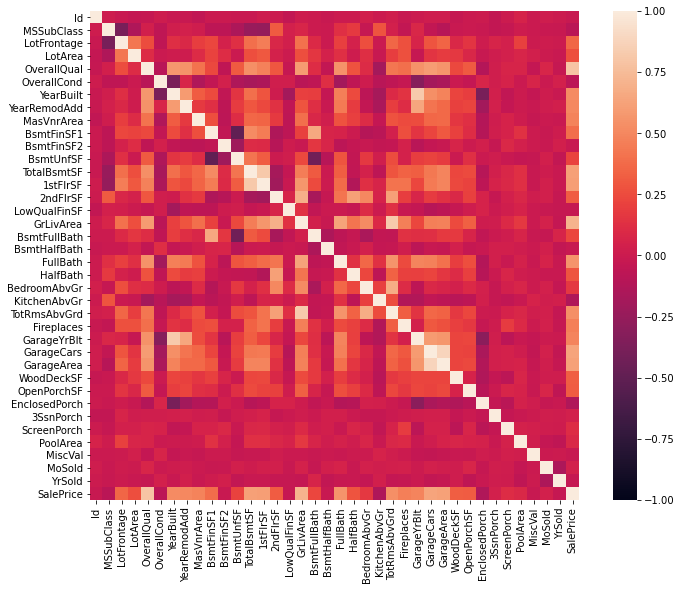

In [49]:
# строим корреляцию, которая определяет признаки, имеющие наибольшую взаимосвязь с ценой дома.
corr = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=1, vmin=-1, square=True);

/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/nadya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


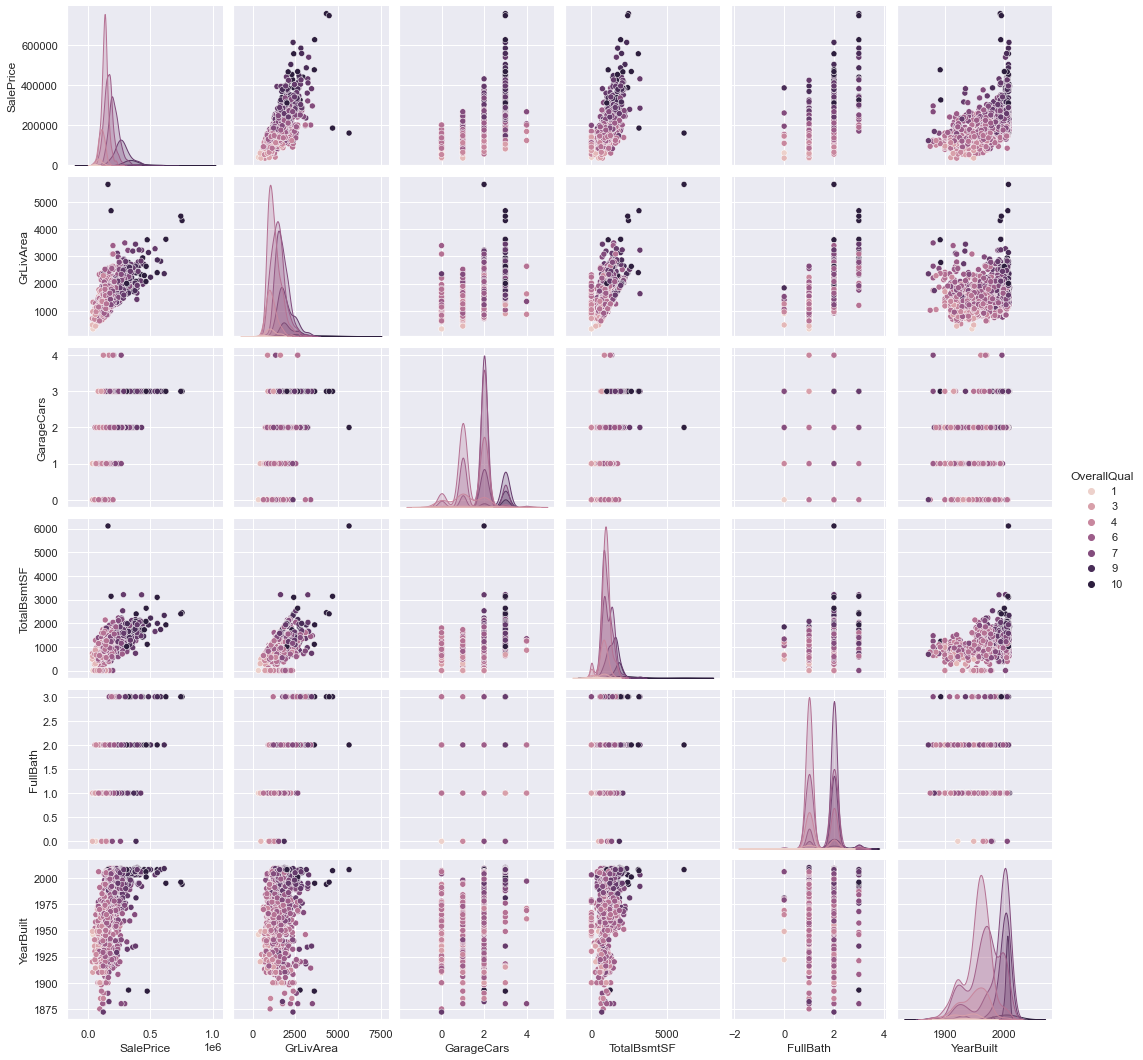

In [110]:
# строим графики, показывающие "отношения" между всеми парами переменных, 
# которые показали наибольшую связь по таблице корреляции с ценой дома. 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5, hue="OverallQual")
plt.show();

In [23]:
# записываем список параметров нужных нам столбцов и отображаем
features = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    'GarageCars',
    'FullBath',
    'MasVnrArea',
    'YearBuilt',
    'YearRemodAdd'
]
target = 'SalePrice'
df_4 = df_3[features+[target]]
df_4

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,MasVnrArea,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,856.0,2.0,2,196.0,2003,2003,208500.0
1,6,1262,1262.0,2.0,2,0.0,1976,1976,181500.0
2,7,1786,920.0,2.0,2,162.0,2001,2002,223500.0
3,7,1717,756.0,3.0,1,0.0,1915,1970,140000.0
4,8,2198,1145.0,3.0,2,350.0,2000,2000,250000.0
...,...,...,...,...,...,...,...,...,...
1454,4,1092,546.0,0.0,1,0.0,1970,1970,NaN
1455,4,1092,546.0,1.0,1,0.0,1970,1970,NaN
1456,5,1224,1224.0,2.0,1,0.0,1960,1996,NaN
1457,5,970,912.0,0.0,1,0.0,1992,1992,NaN


In [59]:
y_submission_CBR=cbr_1.predict(x_test)

In [107]:
x, y = df_4[features][:len(house['SalePrice'])].to_numpy(), df_4[target][:len(house['SalePrice'])].to_numpy()
x.shape, y.shape

((1460, 8), (1460,))

In [108]:
df_4[features]

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,MasVnrArea,YearBuilt,YearRemodAdd
0,7,1710,856.0,2.0,2,196.0,2003,2003
1,6,1262,1262.0,2.0,2,0.0,1976,1976
2,7,1786,920.0,2.0,2,162.0,2001,2002
3,7,1717,756.0,3.0,1,0.0,1915,1970
4,8,2198,1145.0,3.0,2,350.0,2000,2000
...,...,...,...,...,...,...,...,...
1454,4,1092,546.0,0.0,1,0.0,1970,1970
1455,4,1092,546.0,1.0,1,0.0,1970,1970
1456,5,1224,1224.0,2.0,1,0.0,1960,1996
1457,5,970,912.0,0.0,1,0.0,1992,1992


In [26]:
x

array([[   7., 1710.,  856., ...,  196., 2003., 2003.],
       [   6., 1262., 1262., ...,    0., 1976., 1976.],
       [   7., 1786.,  920., ...,  162., 2001., 2002.],
       ...,
       [   7., 2340., 1152., ...,    0., 1941., 2006.],
       [   5., 1078., 1078., ...,    0., 1950., 1996.],
       [   5., 1256., 1256., ...,    0., 1965., 1965.]])

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1095, 8), (365, 8), (1095,), (365,))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm.shape, x_valid_norm.shape

((1095, 8), (365, 8))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


reg = LinearRegression()
reg.fit(x_train_norm, y_train)

# качество модели
print(f'''
    STD:
    train {y_train.std() :.2f}
    test {y_valid.std() :.2f}


    RMSE:
    train {mean_squared_error(reg.predict(x_train_norm), y_train)**.5 :.2f}
    test {mean_squared_error(reg.predict(x_valid_norm), y_valid)**.5 :.2f}

    R2:
    train {r2_score(reg.predict(x_train_norm), y_train) :.2f}
    test {r2_score(reg.predict(x_valid_norm), y_valid) :.2f}

''')




    STD:
    train 78507.87
    test 81934.29


    RMSE:
    train 38810.49
    test 34021.16

    R2:
    train 0.68
    test 0.75




In [32]:
from sklearn.ensemble import RandomForestRegressor


In [37]:
rf_3 = RandomForestRegressor(n_estimators = 3)
rf_100 = RandomForestRegressor(n_estimators = 100)
rf_200 = RandomForestRegressor(n_estimators = 200)
rf_500 = RandomForestRegressor(n_estimators = 500)

In [38]:
rf_3.fit(x_train, y_train)
rf_100.fit(x_train, y_train)
rf_200.fit(x_train, y_train)
rf_500.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [39]:
print('3 trees', mean_squared_error(y_valid, rf_3.predict(x_valid))**.5)
print('100 trees', mean_squared_error(y_valid, rf_100.predict(x_valid))**.5)
print('200 trees', mean_squared_error(y_valid, rf_200.predict(x_valid))**.5)
print('500 trees', mean_squared_error(y_valid, rf_500.predict(x_valid))**.5)

3 trees 35205.73934644246
100 trees 29202.18237156164
200 trees 29709.294935249356
500 trees 29911.63888444099


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
LAS = Lasso()

In [ ]:
param_LAS = {
     'alpha': [1.0, 0.2, 0.5],
     'fit_intercept': [True, False],
     'normalize': [False, True],
     'precompute': [False, True],
     'copy_X': [True, False],
     'max_iter': [1000],
     'tol': [0.0001, 0.001, 0.00002],
     'warm_start': [False, True],
     'positive': [False, True],
     'random_state': [None]
    
}

In [ ]:
LAS = GridSearchCV(
     estimator=LAS,
     param_grid=param_LAS,
     scoring='neg_mean_squared_error', # метрика, которую будем *максимизировать*, поэтому neg
     cv=5, # количество фолдов
     verbose=4, # сколько печатать сообщений
#     n_jobs=-1, # насколько параллелельно считаем
)
LAS.fit(x,y)

In [ ]:
LAS.best_score_, LAS.best_params_

In [ ]:
ridge = Ridge()

In [ ]:
param_ridge = {
     'alpha': [1.0, 0.2, 0.5, 0.0001],
     'fit_intercept': [True, False],
     'normalize': [False, True],
     'copy_X': [True, False],
     'max_iter': [None],
     'tol': [0.001],
     'random_state': [None]
    
}

In [ ]:
ridge = GridSearchCV(
     estimator=ridge,
     param_grid=param_ridge,
     scoring='neg_mean_squared_error', # метрика, которую будем *максимизировать*, поэтому neg
     cv=5, # количество фолдов
     verbose=4, # сколько печатать сообщений
#     n_jobs=-1, # насколько параллелельно считаем
)
ridge.fit(x,y)

In [ ]:
ridge.best_score_, ridge.best_params_

In [40]:
from catboost import CatBoostRegressor

In [41]:
cbr = CatBoostRegressor(iterations = 2500, depth=5)

In [43]:
cbr.fit(x_train, y_train, verbose = 2)
y_pred_cbr = cbr.predict(x_test)


Learning rate set to 0.019769
0:	learn: 77483.0840691	total: 1.64ms	remaining: 4.11s
2:	learn: 75667.8959977	total: 4.63ms	remaining: 3.85s
4:	learn: 73773.1770956	total: 6.76ms	remaining: 3.37s
6:	learn: 72124.0878842	total: 9.05ms	remaining: 3.22s
8:	learn: 70339.0834709	total: 11.3ms	remaining: 3.12s
10:	learn: 68720.5550048	total: 13ms	remaining: 2.95s
12:	learn: 67105.9366931	total: 14.8ms	remaining: 2.83s
14:	learn: 65535.7207296	total: 16.6ms	remaining: 2.75s
16:	learn: 64075.8439452	total: 18.7ms	remaining: 2.73s
18:	learn: 62799.0627019	total: 20ms	remaining: 2.61s
20:	learn: 61422.4405711	total: 21.7ms	remaining: 2.56s
22:	learn: 60138.1860331	total: 23.2ms	remaining: 2.5s
24:	learn: 58908.1333608	total: 24.9ms	remaining: 2.46s
26:	learn: 57688.4909452	total: 26.3ms	remaining: 2.41s
28:	learn: 56529.9537267	total: 27.9ms	remaining: 2.37s
30:	learn: 55490.9360397	total: 29.4ms	remaining: 2.35s
32:	learn: 54372.8572681	total: 32.1ms	remaining: 2.4s
34:	learn: 53354.4536476	tota

514:	learn: 23876.8826754	total: 365ms	remaining: 1.41s
516:	learn: 23851.9121881	total: 367ms	remaining: 1.41s
518:	learn: 23835.0234219	total: 368ms	remaining: 1.41s
520:	learn: 23822.9587859	total: 370ms	remaining: 1.4s
522:	learn: 23818.1261801	total: 371ms	remaining: 1.4s
524:	learn: 23804.9108583	total: 372ms	remaining: 1.4s
526:	learn: 23776.7472672	total: 374ms	remaining: 1.4s
528:	learn: 23753.4412759	total: 375ms	remaining: 1.4s
530:	learn: 23739.0007874	total: 376ms	remaining: 1.4s
532:	learn: 23733.5970864	total: 378ms	remaining: 1.39s
534:	learn: 23715.9318356	total: 380ms	remaining: 1.39s
536:	learn: 23699.0678636	total: 381ms	remaining: 1.39s
538:	learn: 23666.7318062	total: 382ms	remaining: 1.39s
540:	learn: 23648.6241696	total: 384ms	remaining: 1.39s
542:	learn: 23625.5956355	total: 385ms	remaining: 1.39s
544:	learn: 23594.6030216	total: 387ms	remaining: 1.39s
546:	learn: 23565.5749933	total: 389ms	remaining: 1.39s
548:	learn: 23532.3100776	total: 390ms	remaining: 1.39

1072:	learn: 19413.1329348	total: 734ms	remaining: 976ms
1074:	learn: 19400.7724360	total: 735ms	remaining: 974ms
1076:	learn: 19384.0797004	total: 736ms	remaining: 973ms
1078:	learn: 19378.3664497	total: 738ms	remaining: 971ms
1080:	learn: 19366.1670402	total: 739ms	remaining: 970ms
1082:	learn: 19356.9090600	total: 740ms	remaining: 968ms
1084:	learn: 19353.1312420	total: 745ms	remaining: 971ms
1086:	learn: 19335.9417873	total: 746ms	remaining: 969ms
1088:	learn: 19316.4475891	total: 747ms	remaining: 968ms
1090:	learn: 19303.7003940	total: 748ms	remaining: 966ms
1092:	learn: 19290.9122244	total: 750ms	remaining: 965ms
1094:	learn: 19274.0262520	total: 751ms	remaining: 963ms
1096:	learn: 19260.8935003	total: 752ms	remaining: 962ms
1098:	learn: 19250.8870140	total: 753ms	remaining: 960ms
1100:	learn: 19237.8897205	total: 754ms	remaining: 958ms
1102:	learn: 19226.3936576	total: 756ms	remaining: 957ms
1104:	learn: 19218.8996071	total: 757ms	remaining: 955ms
1106:	learn: 19210.7687462	tota

1606:	learn: 16874.4941234	total: 1.1s	remaining: 614ms
1608:	learn: 16866.3324480	total: 1.11s	remaining: 613ms
1610:	learn: 16859.0774772	total: 1.11s	remaining: 612ms
1612:	learn: 16849.9614864	total: 1.11s	remaining: 610ms
1614:	learn: 16837.4970557	total: 1.11s	remaining: 609ms
1616:	learn: 16832.4866394	total: 1.11s	remaining: 608ms
1618:	learn: 16825.4688254	total: 1.11s	remaining: 606ms
1620:	learn: 16816.6130321	total: 1.11s	remaining: 605ms
1622:	learn: 16802.7076009	total: 1.12s	remaining: 604ms
1624:	learn: 16791.4279073	total: 1.12s	remaining: 602ms
1626:	learn: 16790.6524080	total: 1.12s	remaining: 601ms
1628:	learn: 16774.7558394	total: 1.12s	remaining: 600ms
1630:	learn: 16773.8021693	total: 1.12s	remaining: 599ms
1632:	learn: 16764.0693979	total: 1.13s	remaining: 597ms
1634:	learn: 16761.9033531	total: 1.13s	remaining: 596ms
1636:	learn: 16757.7465911	total: 1.13s	remaining: 595ms
1638:	learn: 16747.3067302	total: 1.13s	remaining: 594ms
1640:	learn: 16737.0549519	total

2104:	learn: 14993.6210667	total: 1.47s	remaining: 277ms
2106:	learn: 14990.7062516	total: 1.48s	remaining: 275ms
2108:	learn: 14987.1810245	total: 1.48s	remaining: 274ms
2110:	learn: 14980.7239793	total: 1.48s	remaining: 272ms
2112:	learn: 14975.7523163	total: 1.48s	remaining: 271ms
2114:	learn: 14972.0444875	total: 1.48s	remaining: 270ms
2116:	learn: 14966.0075858	total: 1.48s	remaining: 268ms
2118:	learn: 14955.7453466	total: 1.48s	remaining: 267ms
2120:	learn: 14947.0849095	total: 1.49s	remaining: 265ms
2122:	learn: 14940.7857196	total: 1.49s	remaining: 264ms
2124:	learn: 14932.7870231	total: 1.49s	remaining: 263ms
2126:	learn: 14925.7346605	total: 1.49s	remaining: 261ms
2128:	learn: 14918.8648205	total: 1.49s	remaining: 260ms
2130:	learn: 14912.9287694	total: 1.49s	remaining: 258ms
2132:	learn: 14905.4298996	total: 1.49s	remaining: 257ms
2134:	learn: 14897.5476390	total: 1.5s	remaining: 256ms
2136:	learn: 14888.4662713	total: 1.5s	remaining: 254ms
2138:	learn: 14878.0585129	total:

In [44]:
print(f'CatBoost RMSE: {mean_squared_error(y_valid, y_pred_cbr)**.5}')

CatBoost RMSE: 29219.884095438265


In [45]:
cbr.fit(x, y)

Learning rate set to 0.020808
0:	learn: 78263.3497864	total: 1.65ms	remaining: 4.13s
1:	learn: 77262.9272509	total: 3.38ms	remaining: 4.22s
2:	learn: 76233.4602724	total: 4.52ms	remaining: 3.76s
3:	learn: 75235.6965298	total: 5.59ms	remaining: 3.49s
4:	learn: 74237.2437077	total: 6.62ms	remaining: 3.3s
5:	learn: 73372.3591616	total: 7.95ms	remaining: 3.31s
6:	learn: 72457.1918566	total: 9.32ms	remaining: 3.32s
7:	learn: 71450.0157838	total: 10.5ms	remaining: 3.26s
8:	learn: 70499.1235582	total: 11.5ms	remaining: 3.18s
9:	learn: 69539.9007793	total: 12.6ms	remaining: 3.15s
10:	learn: 68654.8583826	total: 13.6ms	remaining: 3.08s
11:	learn: 67852.3819621	total: 14.5ms	remaining: 3.02s
12:	learn: 66967.6281261	total: 15.6ms	remaining: 2.98s
13:	learn: 66134.6582885	total: 16.5ms	remaining: 2.93s
14:	learn: 65346.1544796	total: 17.6ms	remaining: 2.92s
15:	learn: 64563.0784521	total: 18.5ms	remaining: 2.88s
16:	learn: 63777.4975674	total: 19.5ms	remaining: 2.85s
17:	learn: 62982.5598223	tota

222:	learn: 26770.8070226	total: 177ms	remaining: 1.8s
223:	learn: 26740.9065995	total: 177ms	remaining: 1.8s
224:	learn: 26721.0041189	total: 178ms	remaining: 1.8s
225:	learn: 26693.9939633	total: 179ms	remaining: 1.8s
226:	learn: 26665.5882666	total: 180ms	remaining: 1.8s
227:	learn: 26650.2531159	total: 181ms	remaining: 1.8s
228:	learn: 26637.5774361	total: 182ms	remaining: 1.8s
229:	learn: 26606.1008612	total: 183ms	remaining: 1.81s
230:	learn: 26590.1041927	total: 184ms	remaining: 1.81s
231:	learn: 26571.7324929	total: 184ms	remaining: 1.8s
232:	learn: 26548.8872775	total: 185ms	remaining: 1.8s
233:	learn: 26530.6613475	total: 186ms	remaining: 1.8s
234:	learn: 26509.2179313	total: 187ms	remaining: 1.8s
235:	learn: 26483.3401378	total: 187ms	remaining: 1.8s
236:	learn: 26443.6946948	total: 188ms	remaining: 1.79s
237:	learn: 26422.7796562	total: 189ms	remaining: 1.8s
238:	learn: 26398.0147684	total: 190ms	remaining: 1.8s
239:	learn: 26369.4465183	total: 191ms	remaining: 1.8s
240:	le

439:	learn: 23598.6650664	total: 361ms	remaining: 1.69s
440:	learn: 23588.6957367	total: 362ms	remaining: 1.69s
441:	learn: 23580.1565899	total: 363ms	remaining: 1.69s
442:	learn: 23573.9816292	total: 364ms	remaining: 1.69s
443:	learn: 23561.8693867	total: 364ms	remaining: 1.69s
444:	learn: 23549.6868761	total: 365ms	remaining: 1.68s
445:	learn: 23537.7998530	total: 365ms	remaining: 1.68s
446:	learn: 23526.3799056	total: 366ms	remaining: 1.68s
447:	learn: 23511.2849014	total: 366ms	remaining: 1.68s
448:	learn: 23501.0055640	total: 367ms	remaining: 1.68s
449:	learn: 23489.1879391	total: 368ms	remaining: 1.68s
450:	learn: 23475.7723027	total: 369ms	remaining: 1.68s
451:	learn: 23464.4239578	total: 370ms	remaining: 1.68s
452:	learn: 23452.6403525	total: 371ms	remaining: 1.68s
453:	learn: 23442.9424834	total: 371ms	remaining: 1.67s
454:	learn: 23432.2128415	total: 372ms	remaining: 1.67s
455:	learn: 23419.6096412	total: 373ms	remaining: 1.67s
456:	learn: 23405.1279613	total: 374ms	remaining

683:	learn: 21712.6020665	total: 546ms	remaining: 1.45s
684:	learn: 21702.1763578	total: 546ms	remaining: 1.45s
685:	learn: 21694.7412519	total: 547ms	remaining: 1.45s
686:	learn: 21688.4951832	total: 548ms	remaining: 1.44s
687:	learn: 21681.5628271	total: 548ms	remaining: 1.44s
688:	learn: 21674.6862900	total: 549ms	remaining: 1.44s
689:	learn: 21668.2531736	total: 550ms	remaining: 1.44s
690:	learn: 21662.0678246	total: 550ms	remaining: 1.44s
691:	learn: 21649.8432528	total: 551ms	remaining: 1.44s
692:	learn: 21635.8218688	total: 552ms	remaining: 1.44s
693:	learn: 21630.5605171	total: 552ms	remaining: 1.44s
694:	learn: 21618.6118871	total: 553ms	remaining: 1.44s
695:	learn: 21613.2504756	total: 554ms	remaining: 1.44s
696:	learn: 21604.8924495	total: 555ms	remaining: 1.43s
697:	learn: 21598.5266278	total: 555ms	remaining: 1.43s
698:	learn: 21593.1990020	total: 556ms	remaining: 1.43s
699:	learn: 21578.7820313	total: 557ms	remaining: 1.43s
700:	learn: 21562.3849403	total: 558ms	remaining

920:	learn: 20104.0549568	total: 730ms	remaining: 1.25s
921:	learn: 20096.3225528	total: 730ms	remaining: 1.25s
922:	learn: 20089.2776173	total: 731ms	remaining: 1.25s
923:	learn: 20080.9178811	total: 732ms	remaining: 1.25s
924:	learn: 20079.0358177	total: 733ms	remaining: 1.25s
925:	learn: 20074.1210164	total: 734ms	remaining: 1.25s
926:	learn: 20068.7884791	total: 734ms	remaining: 1.25s
927:	learn: 20062.3815586	total: 735ms	remaining: 1.25s
928:	learn: 20052.5652561	total: 736ms	remaining: 1.24s
929:	learn: 20043.4395353	total: 737ms	remaining: 1.24s
930:	learn: 20039.7528515	total: 737ms	remaining: 1.24s
931:	learn: 20033.1725065	total: 738ms	remaining: 1.24s
932:	learn: 20029.6444131	total: 739ms	remaining: 1.24s
933:	learn: 20020.2235234	total: 739ms	remaining: 1.24s
934:	learn: 20016.7693344	total: 740ms	remaining: 1.24s
935:	learn: 20007.2770139	total: 741ms	remaining: 1.24s
936:	learn: 19999.4470655	total: 742ms	remaining: 1.24s
937:	learn: 19994.9200024	total: 742ms	remaining

1166:	learn: 18793.0722321	total: 915ms	remaining: 1.04s
1167:	learn: 18790.0113787	total: 915ms	remaining: 1.04s
1168:	learn: 18783.9145012	total: 916ms	remaining: 1.04s
1169:	learn: 18780.1139495	total: 917ms	remaining: 1.04s
1170:	learn: 18776.7103255	total: 918ms	remaining: 1.04s
1171:	learn: 18770.5879758	total: 918ms	remaining: 1.04s
1172:	learn: 18761.2144296	total: 919ms	remaining: 1.04s
1173:	learn: 18760.0421740	total: 920ms	remaining: 1.04s
1174:	learn: 18752.4290751	total: 920ms	remaining: 1.04s
1175:	learn: 18747.1237621	total: 921ms	remaining: 1.04s
1176:	learn: 18741.7182557	total: 922ms	remaining: 1.04s
1177:	learn: 18736.1465546	total: 922ms	remaining: 1.03s
1178:	learn: 18735.2975716	total: 923ms	remaining: 1.03s
1179:	learn: 18730.2057414	total: 924ms	remaining: 1.03s
1180:	learn: 18725.8698590	total: 924ms	remaining: 1.03s
1181:	learn: 18721.1998606	total: 925ms	remaining: 1.03s
1182:	learn: 18717.6812649	total: 926ms	remaining: 1.03s
1183:	learn: 18712.8298040	tota

1407:	learn: 17753.6403451	total: 1.1s	remaining: 851ms
1408:	learn: 17752.2999334	total: 1.1s	remaining: 851ms
1409:	learn: 17751.4127890	total: 1.1s	remaining: 850ms
1410:	learn: 17748.5253810	total: 1.1s	remaining: 849ms
1411:	learn: 17745.0904031	total: 1.1s	remaining: 848ms
1412:	learn: 17741.5613004	total: 1.1s	remaining: 847ms
1413:	learn: 17737.1051210	total: 1.1s	remaining: 846ms
1414:	learn: 17731.3895059	total: 1.1s	remaining: 846ms
1415:	learn: 17727.3825270	total: 1.1s	remaining: 845ms
1416:	learn: 17720.2198996	total: 1.1s	remaining: 844ms
1417:	learn: 17719.3879807	total: 1.1s	remaining: 843ms
1418:	learn: 17717.6218554	total: 1.1s	remaining: 842ms
1419:	learn: 17709.9612596	total: 1.11s	remaining: 842ms
1420:	learn: 17706.4597473	total: 1.11s	remaining: 841ms
1421:	learn: 17703.8076047	total: 1.11s	remaining: 840ms
1422:	learn: 17700.9740074	total: 1.11s	remaining: 839ms
1423:	learn: 17697.6369427	total: 1.11s	remaining: 839ms
1424:	learn: 17694.8575921	total: 1.11s	rem

1649:	learn: 16875.1585145	total: 1.28s	remaining: 660ms
1650:	learn: 16874.4877696	total: 1.28s	remaining: 660ms
1651:	learn: 16873.2813907	total: 1.28s	remaining: 659ms
1652:	learn: 16868.3108125	total: 1.28s	remaining: 658ms
1653:	learn: 16865.6367498	total: 1.28s	remaining: 657ms
1654:	learn: 16861.8855071	total: 1.28s	remaining: 656ms
1655:	learn: 16858.6404227	total: 1.29s	remaining: 656ms
1656:	learn: 16856.6946161	total: 1.29s	remaining: 655ms
1657:	learn: 16854.2712900	total: 1.29s	remaining: 654ms
1658:	learn: 16850.0814374	total: 1.29s	remaining: 653ms
1659:	learn: 16846.0958827	total: 1.29s	remaining: 652ms
1660:	learn: 16841.3343717	total: 1.29s	remaining: 651ms
1661:	learn: 16837.4179302	total: 1.29s	remaining: 651ms
1662:	learn: 16832.4293983	total: 1.29s	remaining: 650ms
1663:	learn: 16828.9051798	total: 1.29s	remaining: 649ms
1664:	learn: 16828.1609097	total: 1.29s	remaining: 648ms
1665:	learn: 16822.4504542	total: 1.29s	remaining: 648ms
1666:	learn: 16820.3237347	tota

1894:	learn: 16180.5869204	total: 1.47s	remaining: 468ms
1895:	learn: 16178.9368031	total: 1.47s	remaining: 467ms
1896:	learn: 16178.1671971	total: 1.47s	remaining: 466ms
1897:	learn: 16176.2927454	total: 1.47s	remaining: 466ms
1898:	learn: 16174.7661652	total: 1.47s	remaining: 465ms
1899:	learn: 16174.1025758	total: 1.47s	remaining: 464ms
1900:	learn: 16169.0379856	total: 1.47s	remaining: 463ms
1901:	learn: 16165.8215560	total: 1.47s	remaining: 462ms
1902:	learn: 16164.6688923	total: 1.47s	remaining: 462ms
1903:	learn: 16162.9144717	total: 1.47s	remaining: 461ms
1904:	learn: 16160.4210128	total: 1.47s	remaining: 460ms
1905:	learn: 16157.6878309	total: 1.47s	remaining: 459ms
1906:	learn: 16156.7645371	total: 1.47s	remaining: 458ms
1907:	learn: 16151.2542967	total: 1.48s	remaining: 458ms
1908:	learn: 16148.3111278	total: 1.48s	remaining: 457ms
1909:	learn: 16147.1714238	total: 1.48s	remaining: 456ms
1910:	learn: 16147.0905524	total: 1.48s	remaining: 455ms
1911:	learn: 16146.0494226	tota

2127:	learn: 15565.0870315	total: 1.65s	remaining: 289ms
2128:	learn: 15563.8759483	total: 1.65s	remaining: 288ms
2129:	learn: 15563.5873188	total: 1.65s	remaining: 287ms
2130:	learn: 15562.5547658	total: 1.65s	remaining: 286ms
2131:	learn: 15562.4001804	total: 1.65s	remaining: 285ms
2132:	learn: 15560.7638856	total: 1.65s	remaining: 285ms
2133:	learn: 15558.8664470	total: 1.66s	remaining: 284ms
2134:	learn: 15556.0283134	total: 1.66s	remaining: 283ms
2135:	learn: 15553.7670794	total: 1.66s	remaining: 282ms
2136:	learn: 15551.1783387	total: 1.66s	remaining: 282ms
2137:	learn: 15551.0069215	total: 1.66s	remaining: 281ms
2138:	learn: 15550.7191982	total: 1.66s	remaining: 280ms
2139:	learn: 15549.2706730	total: 1.66s	remaining: 279ms
2140:	learn: 15544.1027627	total: 1.66s	remaining: 278ms
2141:	learn: 15541.0437179	total: 1.66s	remaining: 278ms
2142:	learn: 15540.3467697	total: 1.66s	remaining: 277ms
2143:	learn: 15538.9598344	total: 1.66s	remaining: 276ms
2144:	learn: 15537.1977335	tota

2370:	learn: 14982.4789542	total: 1.84s	remaining: 99.9ms
2371:	learn: 14978.1094639	total: 1.84s	remaining: 99.1ms
2372:	learn: 14976.5280871	total: 1.84s	remaining: 98.4ms
2373:	learn: 14974.5473427	total: 1.84s	remaining: 97.6ms
2374:	learn: 14972.4807138	total: 1.84s	remaining: 96.8ms
2375:	learn: 14970.1511955	total: 1.84s	remaining: 96ms
2376:	learn: 14967.8565069	total: 1.84s	remaining: 95.2ms
2377:	learn: 14964.6386628	total: 1.84s	remaining: 94.5ms
2378:	learn: 14962.9756254	total: 1.84s	remaining: 93.7ms
2379:	learn: 14960.7122233	total: 1.84s	remaining: 92.9ms
2380:	learn: 14957.1660515	total: 1.84s	remaining: 92.1ms
2381:	learn: 14954.4266483	total: 1.84s	remaining: 91.4ms
2382:	learn: 14952.0464259	total: 1.84s	remaining: 90.6ms
2383:	learn: 14950.1297517	total: 1.85s	remaining: 89.8ms
2384:	learn: 14945.8097768	total: 1.85s	remaining: 89.1ms
2385:	learn: 14943.7067341	total: 1.85s	remaining: 88.3ms
2386:	learn: 14941.1390504	total: 1.85s	remaining: 87.5ms
2387:	learn: 149

In [48]:
y_test_pred = cbr.predict(df_4[features][len(house['SalePrice']):])

In [50]:
submission = pd.read_csv('sample_submission.csv')

In [51]:
submission['SalePrice'] = y_test_pred
submission.to_csv('submission_catboost_1.csv', index=False)

In [61]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
all_cat = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [80]:
cbr.fit(df[features][:len(house['SalePrice'])], df[target][:len(house['SalePrice'])])

Learning rate set to 0.020808
0:	learn: 78263.3497864	total: 2.74ms	remaining: 6.85s
1:	learn: 77262.9272509	total: 4.05ms	remaining: 5.06s
2:	learn: 76233.4602724	total: 5.09ms	remaining: 4.24s
3:	learn: 75235.6965298	total: 6.13ms	remaining: 3.82s
4:	learn: 74237.2437077	total: 7.22ms	remaining: 3.6s
5:	learn: 73372.3591616	total: 8.31ms	remaining: 3.45s
6:	learn: 72457.1918566	total: 9.5ms	remaining: 3.38s
7:	learn: 71450.0157838	total: 10.8ms	remaining: 3.36s
8:	learn: 70499.1235582	total: 12.1ms	remaining: 3.35s
9:	learn: 69539.9007793	total: 13.1ms	remaining: 3.27s
10:	learn: 68654.8583826	total: 14.3ms	remaining: 3.23s
11:	learn: 67852.3819621	total: 15.3ms	remaining: 3.18s
12:	learn: 66967.6281261	total: 16.2ms	remaining: 3.1s
13:	learn: 66134.6582885	total: 17.1ms	remaining: 3.03s
14:	learn: 65346.1544796	total: 17.9ms	remaining: 2.97s
15:	learn: 64563.0784521	total: 18.8ms	remaining: 2.92s
16:	learn: 63777.4975674	total: 19.6ms	remaining: 2.86s
17:	learn: 62982.5598223	total:

217:	learn: 26905.6651990	total: 175ms	remaining: 1.83s
218:	learn: 26870.7045804	total: 176ms	remaining: 1.83s
219:	learn: 26839.7875504	total: 177ms	remaining: 1.83s
220:	learn: 26822.6422942	total: 177ms	remaining: 1.83s
221:	learn: 26797.8514652	total: 178ms	remaining: 1.83s
222:	learn: 26770.8070226	total: 179ms	remaining: 1.83s
223:	learn: 26740.9065995	total: 180ms	remaining: 1.83s
224:	learn: 26721.0041189	total: 181ms	remaining: 1.83s
225:	learn: 26693.9939633	total: 182ms	remaining: 1.83s
226:	learn: 26665.5882666	total: 182ms	remaining: 1.82s
227:	learn: 26650.2531159	total: 183ms	remaining: 1.83s
228:	learn: 26637.5774361	total: 184ms	remaining: 1.82s
229:	learn: 26606.1008612	total: 185ms	remaining: 1.82s
230:	learn: 26590.1041927	total: 186ms	remaining: 1.82s
231:	learn: 26571.7324929	total: 186ms	remaining: 1.82s
232:	learn: 26548.8872775	total: 187ms	remaining: 1.82s
233:	learn: 26530.6613475	total: 188ms	remaining: 1.82s
234:	learn: 26509.2179313	total: 189ms	remaining

457:	learn: 23398.5200790	total: 359ms	remaining: 1.6s
458:	learn: 23389.8296712	total: 360ms	remaining: 1.6s
459:	learn: 23374.3764585	total: 361ms	remaining: 1.6s
460:	learn: 23361.8887833	total: 361ms	remaining: 1.6s
461:	learn: 23350.8880961	total: 362ms	remaining: 1.6s
462:	learn: 23338.6094845	total: 363ms	remaining: 1.6s
463:	learn: 23331.9806344	total: 364ms	remaining: 1.6s
464:	learn: 23318.0617774	total: 364ms	remaining: 1.59s
465:	learn: 23304.2800577	total: 365ms	remaining: 1.59s
466:	learn: 23295.7683162	total: 366ms	remaining: 1.59s
467:	learn: 23285.0087400	total: 366ms	remaining: 1.59s
468:	learn: 23276.9379461	total: 367ms	remaining: 1.59s
469:	learn: 23265.3294401	total: 368ms	remaining: 1.59s
470:	learn: 23259.1630536	total: 368ms	remaining: 1.58s
471:	learn: 23252.9671266	total: 369ms	remaining: 1.58s
472:	learn: 23243.2281146	total: 369ms	remaining: 1.58s
473:	learn: 23237.5502508	total: 370ms	remaining: 1.58s
474:	learn: 23229.0055871	total: 371ms	remaining: 1.58s

702:	learn: 21544.9257513	total: 543ms	remaining: 1.39s
703:	learn: 21538.9764015	total: 544ms	remaining: 1.39s
704:	learn: 21531.8459648	total: 545ms	remaining: 1.39s
705:	learn: 21527.4397628	total: 546ms	remaining: 1.39s
706:	learn: 21521.8546686	total: 547ms	remaining: 1.39s
707:	learn: 21510.6526405	total: 547ms	remaining: 1.39s
708:	learn: 21502.2528612	total: 548ms	remaining: 1.38s
709:	learn: 21495.9160589	total: 549ms	remaining: 1.38s
710:	learn: 21491.0704388	total: 549ms	remaining: 1.38s
711:	learn: 21478.5250645	total: 550ms	remaining: 1.38s
712:	learn: 21464.0883827	total: 551ms	remaining: 1.38s
713:	learn: 21451.8023615	total: 551ms	remaining: 1.38s
714:	learn: 21444.6565046	total: 552ms	remaining: 1.38s
715:	learn: 21444.1998469	total: 553ms	remaining: 1.38s
716:	learn: 21441.5782375	total: 554ms	remaining: 1.38s
717:	learn: 21431.8409821	total: 555ms	remaining: 1.38s
718:	learn: 21424.8757702	total: 555ms	remaining: 1.38s
719:	learn: 21418.9244576	total: 556ms	remaining

943:	learn: 19961.5380354	total: 730ms	remaining: 1.2s
944:	learn: 19953.9324727	total: 731ms	remaining: 1.2s
945:	learn: 19949.4344816	total: 732ms	remaining: 1.2s
946:	learn: 19947.5265379	total: 732ms	remaining: 1.2s
947:	learn: 19942.2679591	total: 733ms	remaining: 1.2s
948:	learn: 19939.1770537	total: 734ms	remaining: 1.2s
949:	learn: 19930.4445408	total: 734ms	remaining: 1.2s
950:	learn: 19924.0311227	total: 735ms	remaining: 1.2s
951:	learn: 19916.7663577	total: 735ms	remaining: 1.2s
952:	learn: 19910.5613263	total: 736ms	remaining: 1.19s
953:	learn: 19901.6949923	total: 737ms	remaining: 1.19s
954:	learn: 19896.2349776	total: 738ms	remaining: 1.19s
955:	learn: 19887.7335527	total: 739ms	remaining: 1.19s
956:	learn: 19884.5846309	total: 740ms	remaining: 1.19s
957:	learn: 19877.2466179	total: 740ms	remaining: 1.19s
958:	learn: 19869.5235684	total: 741ms	remaining: 1.19s
959:	learn: 19862.5436797	total: 742ms	remaining: 1.19s
960:	learn: 19859.1071444	total: 743ms	remaining: 1.19s
9

1185:	learn: 18705.8388700	total: 912ms	remaining: 1.01s
1186:	learn: 18700.4352080	total: 913ms	remaining: 1.01s
1187:	learn: 18697.8494623	total: 914ms	remaining: 1.01s
1188:	learn: 18693.8763164	total: 915ms	remaining: 1.01s
1189:	learn: 18691.0031696	total: 916ms	remaining: 1.01s
1190:	learn: 18687.1143606	total: 917ms	remaining: 1.01s
1191:	learn: 18682.5486818	total: 918ms	remaining: 1.01s
1192:	learn: 18678.6005357	total: 919ms	remaining: 1.01s
1193:	learn: 18671.4076715	total: 919ms	remaining: 1s
1194:	learn: 18668.3689029	total: 920ms	remaining: 1s
1195:	learn: 18660.9167370	total: 920ms	remaining: 1s
1196:	learn: 18652.3532099	total: 921ms	remaining: 1s
1197:	learn: 18646.1887954	total: 922ms	remaining: 1s
1198:	learn: 18636.0684186	total: 923ms	remaining: 1s
1199:	learn: 18631.2912327	total: 923ms	remaining: 1s
1200:	learn: 18627.1586202	total: 924ms	remaining: 1000ms
1201:	learn: 18623.8677889	total: 925ms	remaining: 999ms
1202:	learn: 18619.7727639	total: 926ms	remaining: 

1432:	learn: 17663.4072186	total: 1.1s	remaining: 818ms
1433:	learn: 17661.7566999	total: 1.1s	remaining: 817ms
1434:	learn: 17655.2266283	total: 1.1s	remaining: 816ms
1435:	learn: 17651.8349218	total: 1.1s	remaining: 816ms
1436:	learn: 17648.6258593	total: 1.1s	remaining: 815ms
1437:	learn: 17645.0224551	total: 1.1s	remaining: 814ms
1438:	learn: 17637.9618920	total: 1.1s	remaining: 813ms
1439:	learn: 17634.6087814	total: 1.1s	remaining: 812ms
1440:	learn: 17629.6029487	total: 1.1s	remaining: 811ms
1441:	learn: 17623.9969858	total: 1.1s	remaining: 811ms
1442:	learn: 17617.8719914	total: 1.1s	remaining: 810ms
1443:	learn: 17617.5567577	total: 1.11s	remaining: 809ms
1444:	learn: 17614.5829719	total: 1.11s	remaining: 808ms
1445:	learn: 17611.8990422	total: 1.11s	remaining: 807ms
1446:	learn: 17608.6728948	total: 1.11s	remaining: 807ms
1447:	learn: 17604.5118944	total: 1.11s	remaining: 806ms
1448:	learn: 17601.0658658	total: 1.11s	remaining: 805ms
1449:	learn: 17600.7367606	total: 1.11s	re

1676:	learn: 16783.2732512	total: 1.28s	remaining: 631ms
1677:	learn: 16782.1628953	total: 1.29s	remaining: 630ms
1678:	learn: 16779.9240217	total: 1.29s	remaining: 629ms
1679:	learn: 16776.9461643	total: 1.29s	remaining: 629ms
1680:	learn: 16776.6877078	total: 1.29s	remaining: 628ms
1681:	learn: 16775.9493884	total: 1.29s	remaining: 627ms
1682:	learn: 16771.8661582	total: 1.29s	remaining: 626ms
1683:	learn: 16767.5335076	total: 1.29s	remaining: 626ms
1684:	learn: 16765.0748475	total: 1.29s	remaining: 625ms
1685:	learn: 16762.5961995	total: 1.29s	remaining: 624ms
1686:	learn: 16759.3038432	total: 1.29s	remaining: 623ms
1687:	learn: 16756.7466343	total: 1.29s	remaining: 623ms
1688:	learn: 16754.3219850	total: 1.29s	remaining: 622ms
1689:	learn: 16754.0689317	total: 1.29s	remaining: 621ms
1690:	learn: 16752.7483784	total: 1.3s	remaining: 620ms
1691:	learn: 16749.9059023	total: 1.3s	remaining: 619ms
1692:	learn: 16747.4235023	total: 1.3s	remaining: 619ms
1693:	learn: 16745.7952053	total: 

1914:	learn: 16137.6474200	total: 1.47s	remaining: 449ms
1915:	learn: 16135.9642788	total: 1.47s	remaining: 448ms
1916:	learn: 16133.3368806	total: 1.47s	remaining: 447ms
1917:	learn: 16131.8473718	total: 1.47s	remaining: 447ms
1918:	learn: 16129.5873903	total: 1.47s	remaining: 446ms
1919:	learn: 16125.8194389	total: 1.47s	remaining: 445ms
1920:	learn: 16123.4095263	total: 1.47s	remaining: 444ms
1921:	learn: 16118.8186989	total: 1.47s	remaining: 444ms
1922:	learn: 16116.0397580	total: 1.48s	remaining: 443ms
1923:	learn: 16112.9821414	total: 1.48s	remaining: 442ms
1924:	learn: 16110.8256891	total: 1.48s	remaining: 441ms
1925:	learn: 16107.9621602	total: 1.48s	remaining: 440ms
1926:	learn: 16106.5448009	total: 1.48s	remaining: 440ms
1927:	learn: 16102.6566438	total: 1.48s	remaining: 439ms
1928:	learn: 16098.1858505	total: 1.48s	remaining: 438ms
1929:	learn: 16095.3007409	total: 1.48s	remaining: 437ms
1930:	learn: 16094.2238965	total: 1.48s	remaining: 437ms
1931:	learn: 16092.5487414	tota

2146:	learn: 15534.2005897	total: 1.65s	remaining: 272ms
2147:	learn: 15531.6858871	total: 1.65s	remaining: 271ms
2148:	learn: 15528.1660341	total: 1.66s	remaining: 270ms
2149:	learn: 15526.7386487	total: 1.66s	remaining: 270ms
2150:	learn: 15520.7658778	total: 1.66s	remaining: 269ms
2151:	learn: 15519.5575003	total: 1.66s	remaining: 268ms
2152:	learn: 15515.9375530	total: 1.66s	remaining: 267ms
2153:	learn: 15515.7696930	total: 1.66s	remaining: 267ms
2154:	learn: 15512.6561453	total: 1.66s	remaining: 266ms
2155:	learn: 15507.2007011	total: 1.66s	remaining: 265ms
2156:	learn: 15503.5386171	total: 1.66s	remaining: 264ms
2157:	learn: 15500.0851618	total: 1.66s	remaining: 264ms
2158:	learn: 15494.9679510	total: 1.66s	remaining: 263ms
2159:	learn: 15489.4062193	total: 1.66s	remaining: 262ms
2160:	learn: 15488.8270824	total: 1.67s	remaining: 261ms
2161:	learn: 15483.9550626	total: 1.67s	remaining: 261ms
2162:	learn: 15482.1467862	total: 1.67s	remaining: 260ms
2163:	learn: 15480.0996787	tota

2358:	learn: 15009.8688484	total: 1.83s	remaining: 110ms
2359:	learn: 15008.7262174	total: 1.83s	remaining: 109ms
2360:	learn: 15004.5125476	total: 1.84s	remaining: 108ms
2361:	learn: 15001.1233547	total: 1.84s	remaining: 107ms
2362:	learn: 15000.0764838	total: 1.84s	remaining: 107ms
2363:	learn: 14999.0506281	total: 1.84s	remaining: 106ms
2364:	learn: 14996.3910469	total: 1.84s	remaining: 105ms
2365:	learn: 14994.1978960	total: 1.84s	remaining: 104ms
2366:	learn: 14992.2885427	total: 1.84s	remaining: 103ms
2367:	learn: 14990.0437301	total: 1.84s	remaining: 103ms
2368:	learn: 14988.2513198	total: 1.84s	remaining: 102ms
2369:	learn: 14984.8929911	total: 1.84s	remaining: 101ms
2370:	learn: 14982.4789542	total: 1.84s	remaining: 100ms
2371:	learn: 14978.1094639	total: 1.84s	remaining: 99.6ms
2372:	learn: 14976.5280871	total: 1.85s	remaining: 98.8ms
2373:	learn: 14974.5473427	total: 1.85s	remaining: 98.1ms
2374:	learn: 14972.4807138	total: 1.85s	remaining: 97.3ms
2375:	learn: 14970.1511955	

In [77]:
cat = list(object_columns)

In [81]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,MnPrv,Shed,700,7,2006,WD,Normal,NaN


#  Подготовка данных для выгрузки на Kaggle

In [50]:
!head sample_submission.csv
!wc -l sample_submission.csv

Id,SalePrice
1461,169277.0524984
1462,187758.393988768
1463,183583.683569555
1464,179317.47751083
1465,150730.079976501
1466,177150.989247307
1467,172070.659229164
1468,175110.956519547
1469,162011.698831665
    1460 sample_submission.csv


In [ ]:
target = 'SalePrice'
x_test = df_6[len(house['SalePrice']):].to_numpy()

x_test.shape

In [ ]:
y_submission_CBR=cbr_1.predict(x_test)

In [60]:
house_test['SalePrice'] = y_submission_CBR
house_test[['Id','SalePrice']].to_csv('submission_Cat_Boost.csv', index=False)
!head submission_Cat_Boost.csv


Id,SalePrice
1461,126255.33861564484
1462,167123.61339628807
1463,184252.09995029165
1464,191220.3877967121
1465,180784.3725524366
1466,170704.73969211758
1467,172617.5224214093
1468,162525.95518302827
1469,184309.52804212002
